In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/VincentHalim11/ALP-DATAMINIG-DATASET/refs/heads/main/student_performance_updated_1000.csv"
df = pd.read_csv(url)
df.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [4]:
df.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,950.000000,967.000000,957.000000,960.000000,976.000000,959.000000
mean,5416.019792,85.510417,17.630526,77.598759,1.520376,80.030208,2.406967,77.248175
std,2653.748319,7.332125,6.272132,10.006640,1.046439,9.493652,1.620267,19.298148
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,3113.500000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5396.500000,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,7754.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000


In [5]:
unique_value = {col: df[col].unique() for col in df.columns}
display(unique_value)

{'StudentID': array([1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
        7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 2.824e+03, 7.912e+03,
        4.611e+03, 6.514e+03,       nan, 2.139e+03, 8.573e+03, 5.386e+03,
        3.340e+03, 6.930e+03, 2.040e+03, 9.797e+03, 9.201e+03, 9.837e+03,
        1.949e+03, 3.705e+03, 8.177e+03, 1.117e+03, 4.510e+03, 6.804e+03,
        4.139e+03, 2.604e+03, 1.960e+03, 3.536e+03, 1.821e+03, 4.853e+03,
        1.152e+03, 2.127e+03, 5.905e+03, 6.617e+03, 1.058e+03, 3.442e+03,
        6.862e+03, 3.900e+03, 7.267e+03, 1.387e+03, 1.452e+03, 8.149e+03,
        6.967e+03, 7.691e+03, 5.930e+03, 8.618e+03, 2.530e+03, 8.461e+03,
        2.746e+03, 3.184e+03, 9.976e+03, 4.919e+03, 3.267e+03, 7.812e+03,
        8.814e+03, 4.595e+03, 9.751e+03, 1.823e+03, 7.906e+03, 1.508e+03,
        8.619e+03, 2.771e+03, 2.669e+03, 9.289e+03, 8.135e+03, 6.280e+03,
        1.470e+03, 1.166e+03, 8.342e+03, 8.753e+03, 2.976e+03, 2.647e+03,
        1.745e+03, 8.216e

In [6]:
df.isna().sum()

StudentID                    40
Name                         34
Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

# data cleaning

In [7]:
df = df.drop(columns=['StudentID','Name','Gender','Attendance (%)','Study Hours'])
df = df.dropna(subset=['FinalGrade'])

#attendance(%) dan study hours di drop karena missing datanya lebih banyak dari pada attendencerate
#study hours di drop karena studyhoursperweek lebih informatif dan tidak terlalu terpengaruh fluktuasi harian
#dan lebih relevan untuk dikaitkan dengan performa akademik

In [8]:
df[['ParentalSupport','Online Classes Taken']] = df[['ParentalSupport','Online Classes Taken']].fillna("unknown")
col_name = ['AttendanceRate','StudyHoursPerWeek','PreviousGrade','ExtracurricularActivities']
df[col_name] = df[col_name].fillna(df[col_name].median())

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 998
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AttendanceRate             960 non-null    float64
 1   StudyHoursPerWeek          960 non-null    float64
 2   PreviousGrade              960 non-null    float64
 3   ExtracurricularActivities  960 non-null    float64
 4   ParentalSupport            960 non-null    object 
 5   FinalGrade                 960 non-null    float64
 6   Online Classes Taken       960 non-null    object 
dtypes: float64(5), object(2)
memory usage: 60.0+ KB


# EDA

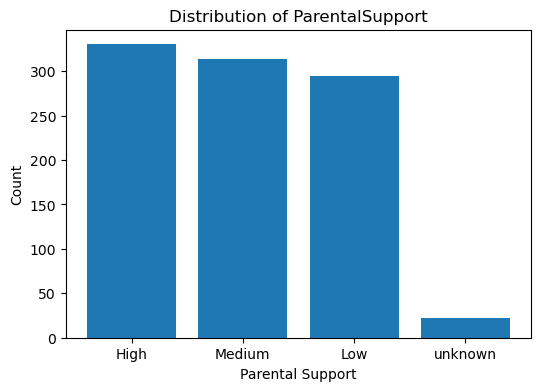

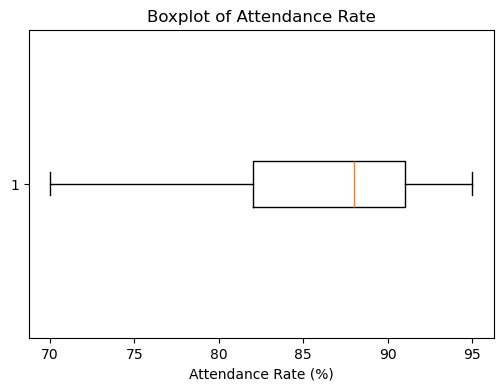

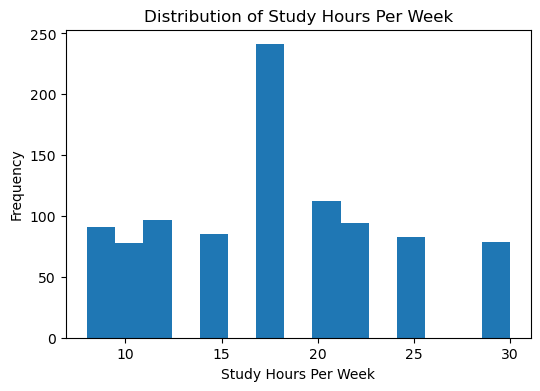

In [10]:
col = 'ParentalSupport'
value_counts = df['ParentalSupport'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(value_counts.index,value_counts.values)
plt.xlabel('Parental Support')
plt.ylabel('Count')
plt.title(f'Distribution of {col}')
plt.show()


plt.figure(figsize=(6,4))
plt.boxplot(df['AttendanceRate'], vert=False)
plt.xlabel('Attendance Rate (%)')
plt.title('Boxplot of Attendance Rate')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['StudyHoursPerWeek'], bins=15)
plt.xlabel('Study Hours Per Week')
plt.ylabel('Frequency')
plt.title('Distribution of Study Hours Per Week')
plt.show()



In [11]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = df.copy()
df_encoded['Online Classes Taken'] = (
    df_encoded['Online Classes Taken']
    .replace('unknown', False)
    .astype(int)
)

nominal_col = ['Online Classes Taken']
encoder = OrdinalEncoder()
df_encoded[nominal_col] = encoder.fit_transform(df_encoded[nominal_col])

ordinal_col = ['ParentalSupport']
ordinal_encoder = OrdinalEncoder(categories=[['Low','Medium','High','unknown']])
df_encoded[ordinal_col] = ordinal_encoder.fit_transform(df_encoded[ordinal_col])

encode_dict = {}

for col, cats in zip(nominal_col,encoder.categories_):
    encode_dict[col] = {category : int (code) for code,category in enumerate(cats)}

import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n=5)


{'Online Classes Taken': {0: 0, 1: 1}}


C:\Users\Vincent H\AppData\Local\Temp\ipykernel_8000\2055100108.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('unknown', False)


,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Online Classes Taken
91,95.0,20.0,65.0,1.0,1.0,78.0,1.0
378,82.0,22.0,85.0,2.0,2.0,87.0,1.0
597,85.0,20.0,78.0,0.0,2.0,72.0,0.0
803,88.0,18.0,85.0,3.0,0.0,78.0,0.0
533,85.0,17.0,65.0,0.0,2.0,92.0,1.0


# K-Means Clustering Model

In [12]:
features = df_encoded.copy()

x_unscaled = features.values
scaler = StandardScaler()

x_scaled = scaler.fit_transform(features)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

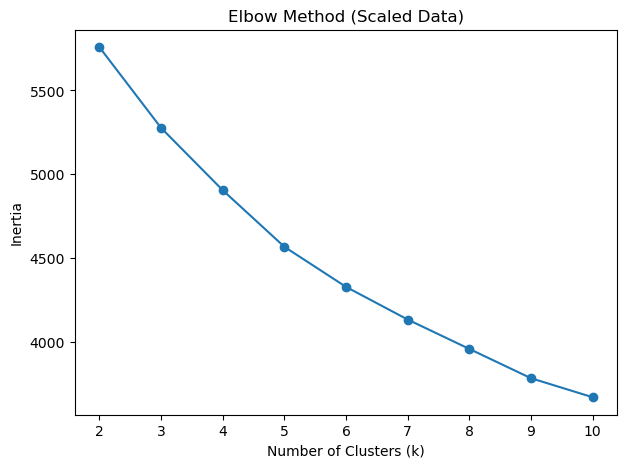

In [13]:
from sklearn.cluster import KMeans

inertia_list = []
K = range(2,11)

for k in K:
    km = KMeans(n_clusters=k,random_state=42,n_init=10)
    km.fit(x_scaled)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertia_list, marker='o')
plt.title("Elbow Method (Scaled Data)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [14]:
k = 4
kmean_scaled = KMeans(n_clusters=k,random_state=42,n_init=10)
kmean_unscaled = KMeans(n_clusters=k,random_state=42,n_init=10)

cluster_scaled = kmean_scaled.fit_predict(x_scaled)
cluster_unscaled = kmean_unscaled.fit_predict(x_unscaled)

df['Cluster_Scaled'] = cluster_scaled
df_encoded['Cluster_Scaled'] = cluster_scaled

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [15]:
from sklearn.metrics import silhouette_score

inertia_scaled = kmean_scaled.inertia_
inertia_unscaled = kmean_unscaled.inertia_

sil_scaled = silhouette_score(x_scaled,cluster_scaled)
sil_unscaled = silhouette_score(x_unscaled,cluster_unscaled)

print("Inertia (Unscaled) :", inertia_unscaled)
print("Inertia (Scaled)   :", inertia_scaled)
print("Silhouette (Unscaled):", sil_unscaled)
print("Silhouette (Scaled):", sil_scaled)

Inertia (Unscaled) : 125584.30678784322
Inertia (Scaled)   : 4905.539682572968
Silhouette (Unscaled): 0.2671811002412896
Silhouette (Scaled): 0.12780263364330452


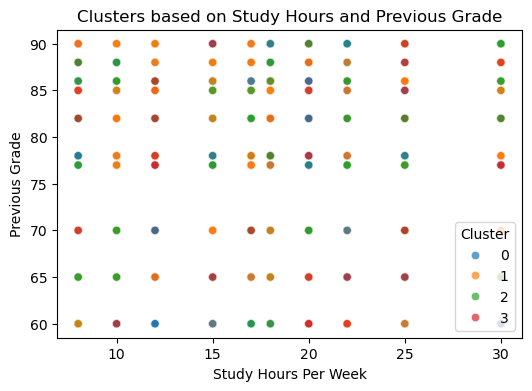

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='StudyHoursPerWeek',
    y='PreviousGrade',
    hue='Cluster_Scaled',
    palette='tab10',
    alpha=0.7
)

plt.title('Clusters based on Study Hours and Previous Grade')
plt.xlabel('Study Hours Per Week')
plt.ylabel('Previous Grade')
plt.legend(title='Cluster')
plt.show()

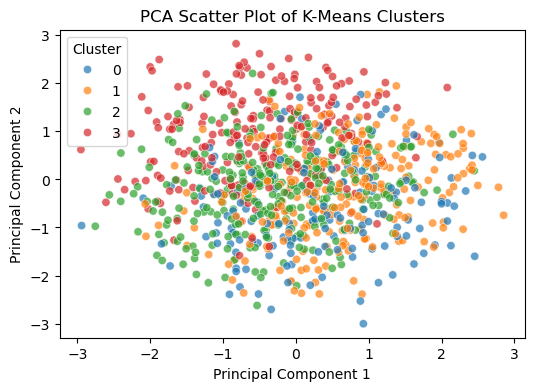

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='PCA1',
    y='PCA2',
    hue='Cluster_Scaled',
    palette='tab10',
    alpha=0.7
)

plt.title('PCA Scatter Plot of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


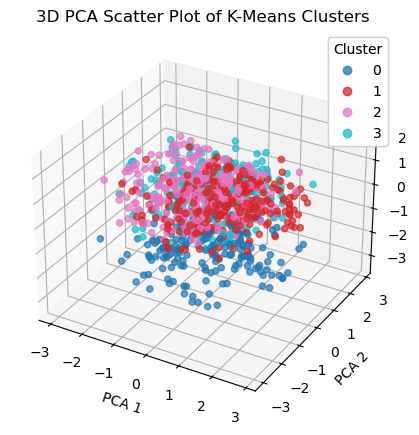

In [18]:
from mpl_toolkits.mplot3d import Axes3D  # wajib untuk 3D

# PCA ke 3 dimensi
pca = PCA(n_components=3, random_state=42)
X_pca_3d = pca.fit_transform(x_scaled)

# Simpan ke df (opsional tapi rapi)
df['PCA1'] = X_pca_3d[:, 0]
df['PCA2'] = X_pca_3d[:, 1]
df['PCA3'] = X_pca_3d[:, 2]

# Plot 3D
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['PCA1'],
    df['PCA2'],
    df['PCA3'],
    c=df['Cluster_Scaled'],
    cmap='tab10',
    alpha=0.7
)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D PCA Scatter Plot of K-Means Clusters')

legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()


In [19]:
num_cols = [
    'StudyHoursPerWeek',
    'AttendanceRate',
    'PreviousGrade',
    'ExtracurricularActivities',
    'ParentalSupport',
    'Online Classes Taken'
]
df_encoded.groupby('Cluster_Scaled')[num_cols].agg(['mean','median'])


StudyHoursPerWeek        AttendanceRate        PreviousGrade  \
                            mean median           mean median          mean   
Cluster_Scaled                                                                
0                      17.508671   18.0      73.306358   70.0     77.011561   
1                      18.048148   18.0      88.877778   90.0     77.762963   
2                      17.736301   18.0      87.739726   88.0     78.171233   
3                      17.146667   18.0      88.342222   88.0     77.208889   

                      ExtracurricularActivities        ParentalSupport         \
               median                      mean median            mean median   
Cluster_Scaled                                                                  
0                78.0                  1.554913    2.0        0.976879    1.0   
1                78.0                  1.529630    1.0        0.970370    1.0   
2                82.0                  1.393836    1.0        1.061644    1.0   
3                78.0                  1.537778    1.0        1.328889    1.0   

               Online Classes Taken         
                               mean median  
Cluster_Scaled                              
0                          0.381503    0.0  
1                          0.000000    0.0  
2                          1.000000    1.0  
3                          0.511111    1.0

In [20]:
df_encoded.groupby('Cluster_Scaled')['FinalGrade'].agg(['mean','median'])


,mean,median
Cluster_Scaled,,
0,79.994220,80.0
1,84.766667,87.0
2,85.606164,87.0
3,67.137778,68.0


ada 4 cluster / kelompok :

kelompok 1 : 
- memiliki rata - rata belajar seminggu 17 jam
- memiliki rata - rata masuk kelas 73%
- rata - rata nilai sebelumnya 77 dengan paling banyak 78
- mengikuti 2 ekstra
- didukung ortu
- ikut online class tapi lebih banyak absennya
nilai akhir pada finals rata - rata 79

kelompok 2 : 
- memiliki rata - rata belajar seminggu 18 jam
- memiliki rata - rata masuk kelas 88% dengan paling banyak 90%
- rata - rata nilai sebelumnya 77 dengan paling banyak 78
- mengikuti 1 ekstra
- didukung ortu
- tidak ikut online class
nilai akhir pada finals rata - rata 84

kelompok 3 : 
- memiliki rata - rata belajar seminggu 17 jam
- memiliki rata - rata masuk kelas 87%
- rata - rata nilai sebelumnya 78 dengan paling banyak 82
- mengikuti 1 ekstra
- didukung ortu
- ikut online class
nilai akhir pada finals rata - rata 85

kelompok 4 : 
- memiliki rata - rata belajar seminggu 17 jam
- memiliki rata - rata masuk kelas 88% dengan paling banyak 88%
- rata - rata nilai sebelumnya 77 dengan paling banyak 78
- mengikuti 1 ekstra
- didukung ortu
- ikut online class tapi masih absen beberapa kali
nilai akhir pada finals rata - rata 67

kesimpulan : 
- kelompok 1 adalah siswa yang cukup aktif disekolah dengan mengikuti 2 ekstrakulikuler yang menyebabkan attendence ratenya lebih rendah dari yang lain karena ia memiliki banyak kegiatan ekstra dan mereka masih megnikuti kelas online akan tetapi mungkin karena keterbatasan waktu mereka banyak tidak mengikuti kelas online dan mereka mendapatkan rata - rata nilai finals 79  

- kelompok 2 adalah siswa yang memiliki jam belajar paling lama dalam seminggu yaitu 18 jam. mereka juga memiliki attendence rate paling tinggi dibanding yang lain dnegan persentase 88% dan paling banyak ada di 90% dan mereka tidak mengikuti kelas online dan berhasil mendapatkan rata - rata nilai finals paling tinggi ke-2 yaitu 84% nilai mereka sedikit lebih kecil dari kelompok 3 bisa jadi karena kelompok 2 lebih belajar mandiri dan tidak mengikuti kelas online

- kelompok 3 adalah siswa yang sering masuk kelas dengan rata - rata attendencerate sebesar 87%. mereka hanya mengikuti 1 ekstra dan memiliki rata - rata nilai ujian sebelumnya yang paling tinggi yaitu di 78 dengan paling banyak ada di angka 82. mereka mengikuti kelas online tanpa adanya absen dan mendapatkan rata - rata nilai finals paling tinggi yaitu 85%. siswa dalam kelompok ini adalah siswa yang pintar dalam akademik  dan paling rajin.

- kelompok 4 adaalah siswa yang memiliki rata" attendence rate yang tinggi diangka 88% mereka hanya mengikuti 1 ekstra dan mengikuti kelas online meskipun absen beberapa kali. akan tetapi kelompok ini memiliki rata - rata nilai final paling rendah yaitu 67% bisa jadi kelompok ini adalah siswa yang cukup kesusahan dalam belajar dapat dibuktikan dengan jam belajar mereka yang mirip dnegan kelompok lain, sering mengikuti kelas dan mengikuti kelas online akan tetapi mereka masih mendapatkan rata - rata nilai yang cukup rendah.

# Hierarchical Agglomerative Clustering

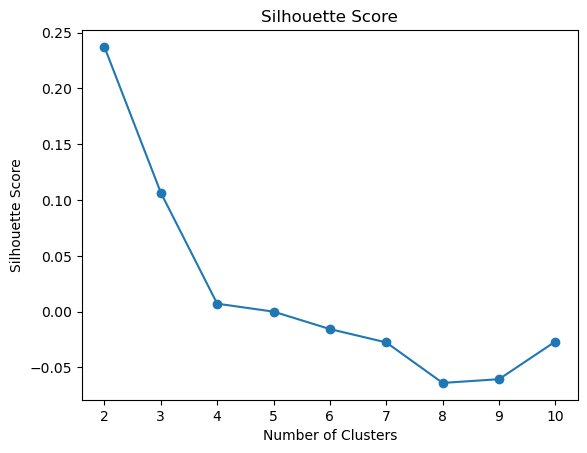

In [21]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

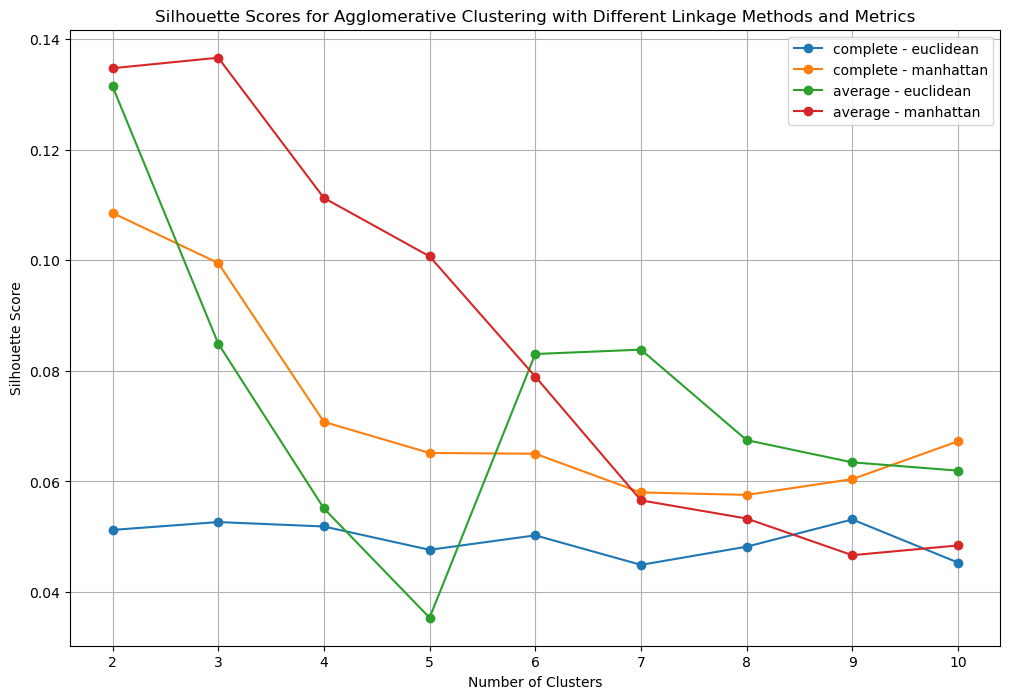

Best Silhouette Score: 0.13662918939778468
Optimal Number of Clusters: 3
Optimal Linkage Method: average
Optimal Metric: manhattan


In [22]:
range_n_clusters = range(2,11)
linkage_methods = ['complete','average']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = None
best_linkage = None
best_metric = None

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        
        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(x_scaled)
            silhouette_avg = silhouette_score(x_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage' : linkage_method,
            'metric' : metric,
            'score': current_scores
    })

plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['score'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")


disini alasan menggunakan manhattan karena Data yang digunakan tidak sepenuhnya berupa angka kontinu, tetapi terdiri dari nilai hitungan, hasil encoding ordinal, dan variabel biner.

In [23]:
agglo_final = AgglomerativeClustering(n_clusters=best_n_clusters,linkage=best_linkage,metric=best_metric)
df_encoded['Cluster_HAC'] = agglo_final.fit_predict(x_scaled)

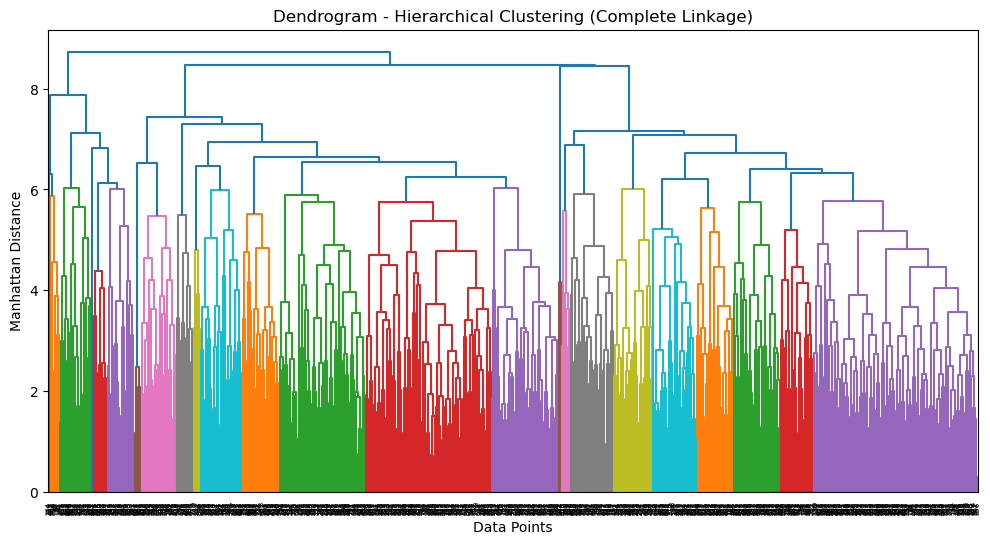

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_metrix = linkage(x_scaled,method='average',metric='cityblock')

plt.figure(figsize=(12,6))
dendrogram(linkage_metrix)
plt.title('Dendrogram - Hierarchical Clustering (Complete Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Manhattan Distance')
plt.show()

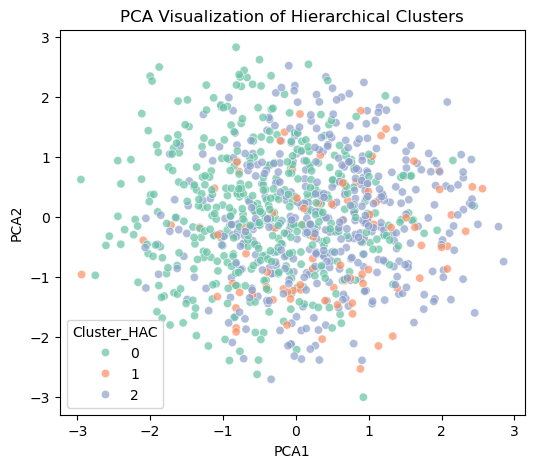

In [25]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(x_scaled)

df_encoded['PCA1'] = X_pca[:,0]
df_encoded['PCA2'] = X_pca[:,1]

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df_encoded,
    x='PCA1',
    y='PCA2',
    hue='Cluster_HAC',
    palette='Set2',
    alpha=0.7
)
plt.title('PCA Visualization of Hierarchical Clusters')
plt.show()


In [26]:
df_encoded.groupby('Cluster_HAC')[num_cols].agg(['mean','median'])

StudyHoursPerWeek        AttendanceRate        PreviousGrade  \
                         mean median           mean median          mean   
Cluster_HAC                                                                
0                   17.290993   17.0      86.951501   88.0     77.274827   
1                   17.910112   18.0      71.213483   70.0     79.786517   
2                   17.940639   18.0      87.187215   88.0     77.525114   

                   ExtracurricularActivities        ParentalSupport         \
            median                      mean median            mean median   
Cluster_HAC                                                                  
0             78.0                  1.473441    1.0        1.122402    1.0   
1             85.0                  1.573034    2.0        0.887640    1.0   
2             78.0                  1.500000    1.0        1.084475    1.0   

            Online Classes Taken         
                            mean median  
Cluster_HAC                              
0                       1.000000    1.0  
1                       0.449438    0.0  
2                       0.000000    0.0

In [27]:
df_encoded.groupby('Cluster_HAC')['FinalGrade'].agg(['mean','median'])

,mean,median
Cluster_HAC,,
0,80.545035,85.0
1,78.067416,80.0
2,79.920091,80.0


dengan hierarchical cluster didapatkan 3 cluster/kelompok

kelompok 1 : 
- memiliki rata - rata studyhourperweek 17 jam 
- rata - rata attendacerate paling tinggi ke-2 yaitu 86%
- rata - rata nilai ujian sebelumnya 77 
- mengikuti 1 ekstra
- didukung ortu
- mengikuti kelas online
rata - rata finals adalah 80 

kelompok 2 : 
- memiliki rata - rata studyhourperweek 17 jam 
- rata - rata attendacerate paling rendah yaitu 71%
- rata - rata nilai ujian sebelumnya paling tinggi yaitu 79
- mengikuti 2 ekstra
- didukung ortu
- mengikuti kelas online tetapi sering bolos
rata - rata finals adalah 78

kelompok 3 : 
- memiliki rata - rata studyhourperweek 17 jam 
- rata - rata attendacerate paling tinggi yaitu 87%
- rata - rata nilai ujian sebelumnya yaitu 77
- mengikuti 1 ekstra
- didukung ortu
- tidak mengikuti kelas online
rata - rata finals adalah 79

kesimpulan : 
- kelompok 1 adalah siswa yang sering masuk kelas mereka mengikuti 1 ekstra dan mengikuti kelas online dan rata - rata nilai finals mereka juga yang paling tinggi yaitu 80. nilai mereka bisa jadi yang paling tinggi karena kelompok ini sering menngikuti kelas dengan persentase 86% lalu mereka mengikuti kelas online sehingga membantu mereka belajar lebih untuk mendapatkan nilai yang lebih baik

- kelompok 2 adalah siswa yang cukup sering tidak masuk kelas dengan persentase masuk kelas hanya 71% akan tetapi mereka memiliki 2 ekstra dan memiliki nilai sebelumnya yang paling tinggi dengan rata - rata 79 mereka juga mengikuti kelas online akan tetapi sering bolos. mereka memiliki nilai rata - rata finals paling rendah yaitu 78 mungkin ini terjadi karena mereka teralu sibuk dengan kegiatan diluar pemberlajaran karena mereka mengikuti 2 ekstrakulikuler dan karena ini juga mereka sering tidak masuk kelas dan sering bolos kelas online

- kelompok 3 adalah siswa yang paling sering masuk kelas dengan rata -rata attendencerate sebesari 87% mereka hanya mengikuti 1 ekstra dan tidak mengikuti kelas online. nilai rata - rata finals mereka adalah 79. nilai mereka sedikit lebih unggul daripada kelompok 2 bisa karena kelompok 3 lebih sering mengikuti kelas dan hanya memiliki 1 ekstrakulikuler sehingga mereka memiliki waktu untuk belajar lebih lahi